# Prediction of Iron Ore Quality in Mining Process

# Introduction

Here we create a model which will predict the purity of an ore using the various lab result values, done on a sample of that ore..

# Dataset

The dataset used in this project is take from the Kaggle website.
<br>
<b>Dataset Link:- https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process </b>
<br>
In this dataset there is a table which contains 24 columns and around 735000 rows.
<br>
<b>Some of the columns are:</b>% Iron Feed, % Silica Feed, Starch Flow, Ore Pulp Flow, Floatation columns and so on.

# Aim

The main aim is to build a model using various approaches that will be able to predict an ore's purity and impurity using the different column values as input.

# Approach

We will try to build the models using different algorithms of ML and DL and compare their accuracy. In this notebook we will be building models using Linear Regression, Decision Trees, Random Forest and Artificial Neural Networks.

## Importing the required libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("./MiningProcess_Flotation_Plant_Database.csv",
                     decimal=",",
                     parse_dates=["date"])

In [3]:
dataset.shape

(737453, 24)

In [7]:
dataset.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


**Checking for duplicate records and removing them**

In [10]:
initial = dataset.shape[0]
dataset.shape[0]

737453

In [11]:
dataset = dataset.drop_duplicates()

In [12]:
final = dataset.shape[0]
dataset.shape[0]

736282

In [79]:
print("Number of duplicate rows removed: ",initial-final)

Number of duplicate rows removed:  1171


In [18]:
#Checking if there are rows having some empty fields
dataset[dataset.isna()==False]
dataset.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [19]:
dataset.shape

(736282, 24)

In [82]:
dataset.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

In [83]:
dataset.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


### Data Visualisation

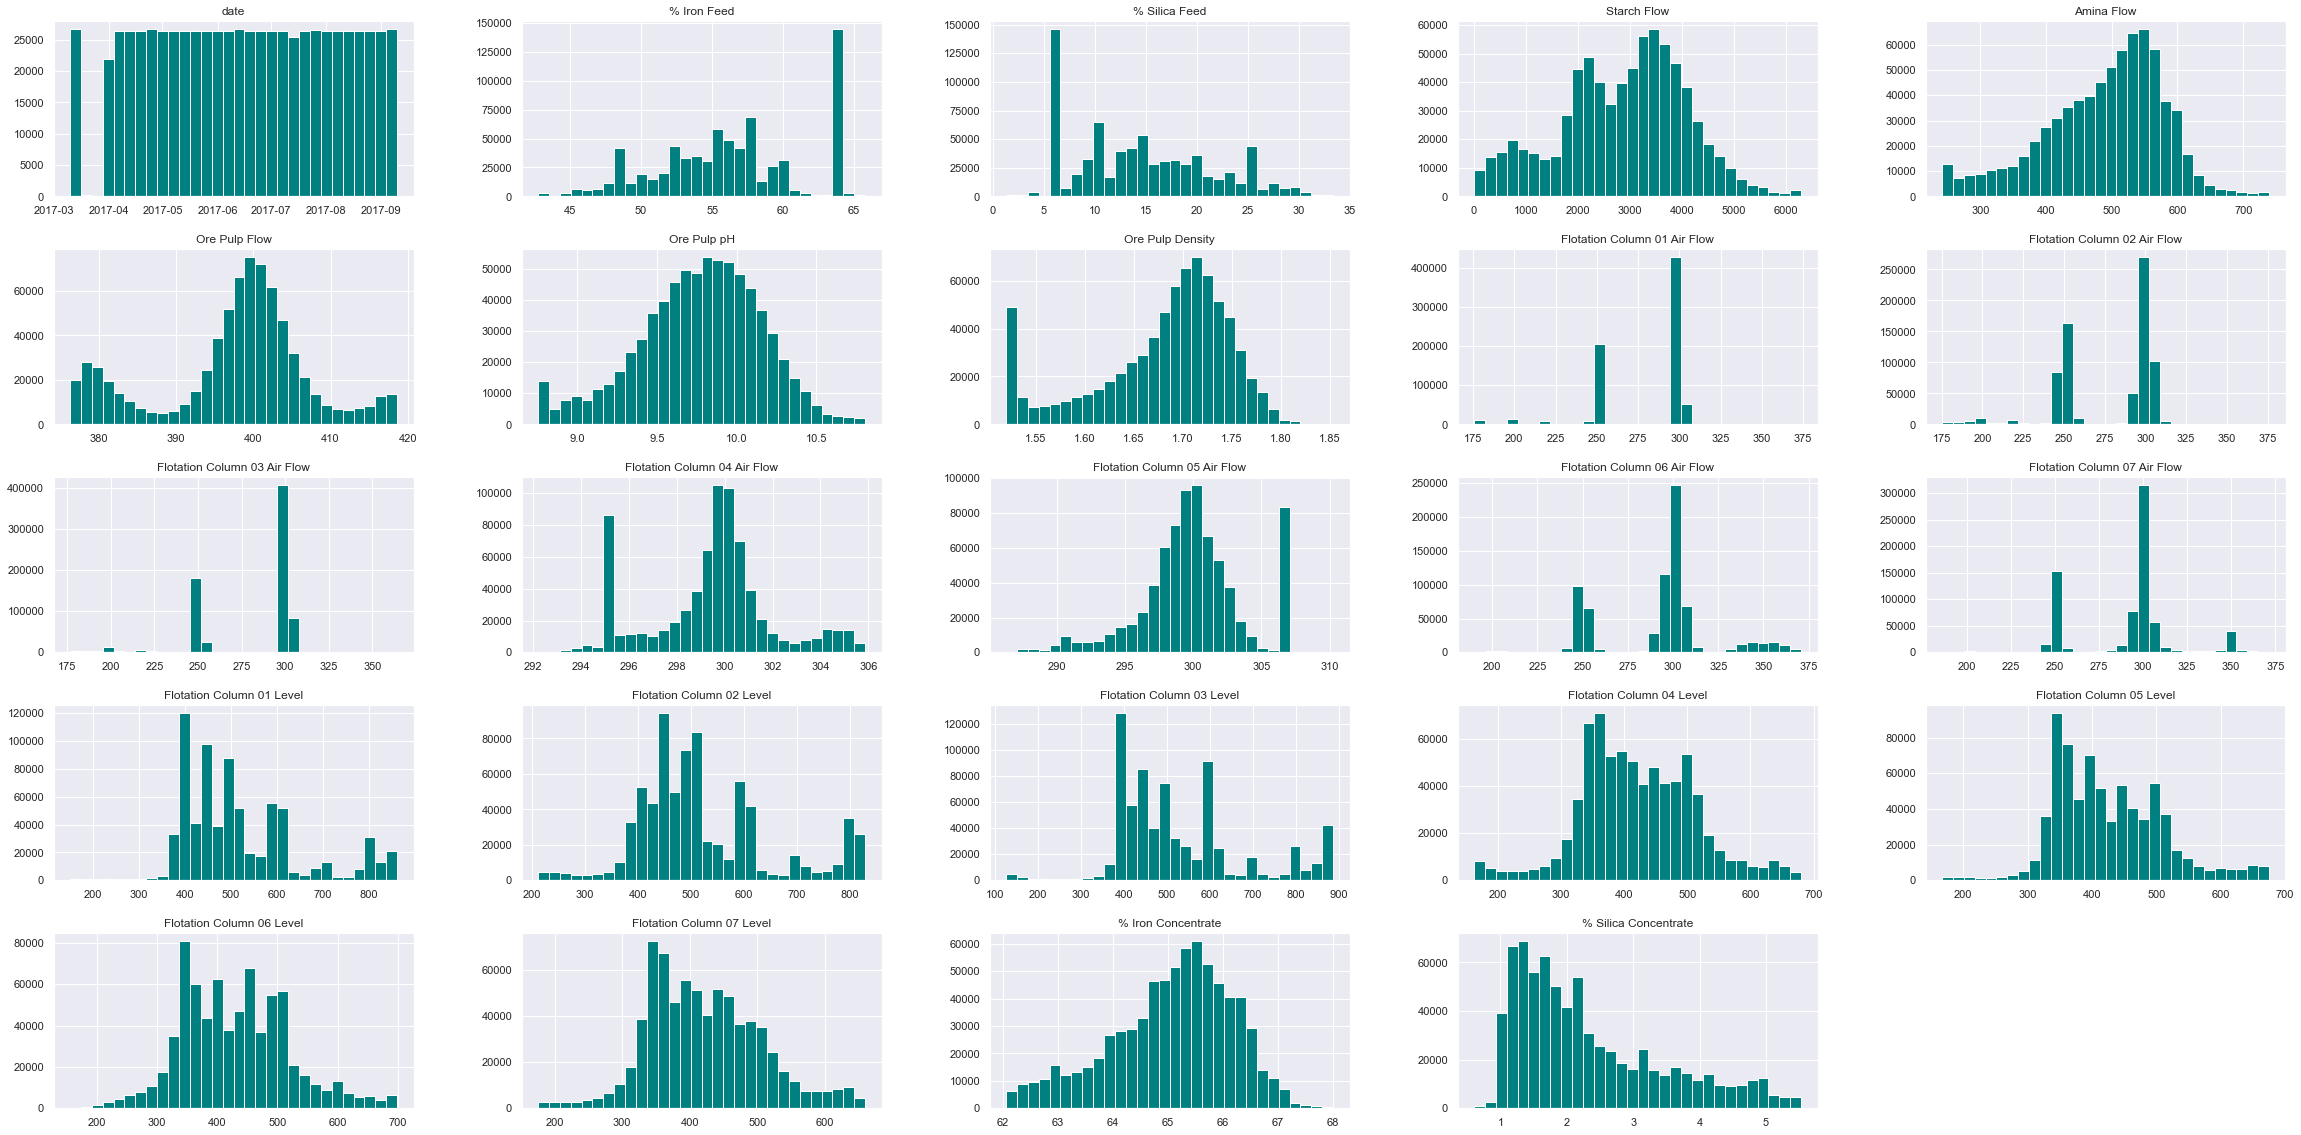

In [23]:
plt.style.use("seaborn-darkgrid")
sns.set()

dataset.hist(bins=30, figsize=(40,20), color='teal')
plt.title("Histogram Plot of the Features")
plt.show()

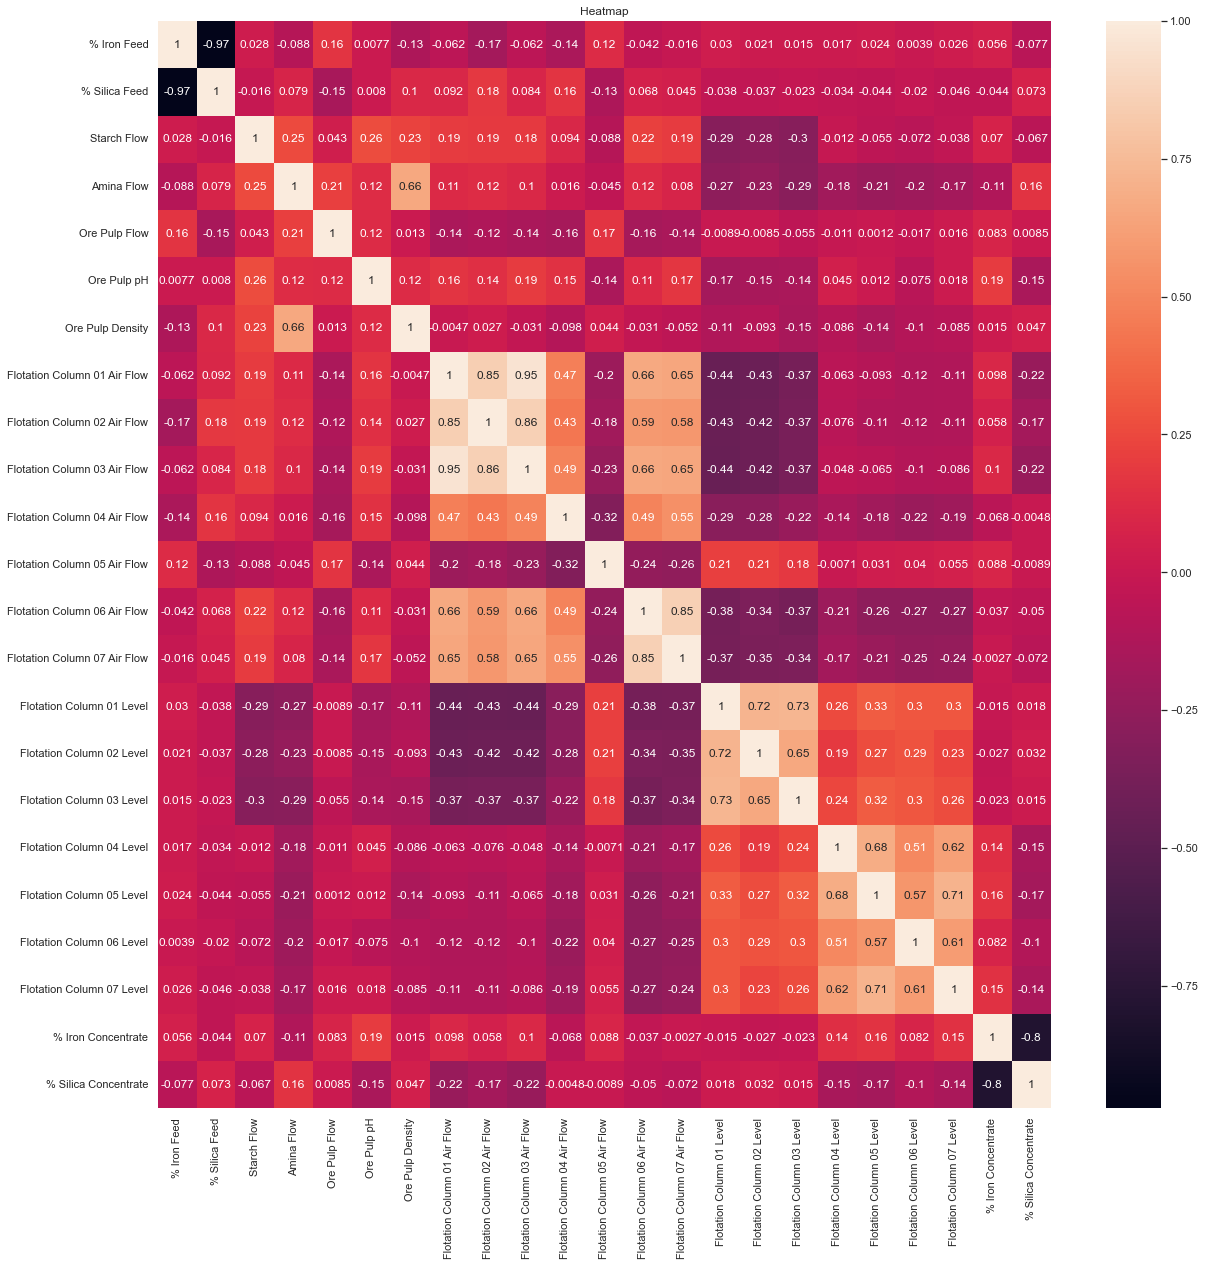

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True)
plt.title("Heatmap")
plt.show()

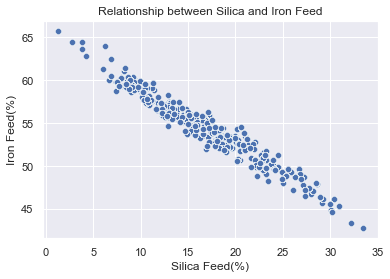

In [97]:
sns.scatterplot(x='% Silica Feed', y='% Iron Feed', data=dataset)
plt.xlabel('Silica Feed(%)')
plt.ylabel('Iron Feed(%)')
plt.title('Relationship between Silica and Iron Feed')
plt.show()

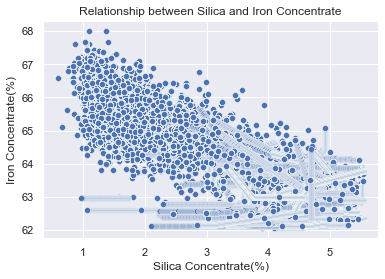

In [99]:
sns.scatterplot(x='% Silica Concentrate', y='% Iron Concentrate', data=dataset)
plt.xlabel('Silica Concentrate(%)')
plt.ylabel('Iron Concentrate(%)')
plt.title('Relationship between Silica and Iron Concentrate')
plt.show()

## Creating Training and Testing Dataset

In [59]:
df_iron = dataset.drop(columns = ['date','Flotation Column 01 Air Flow','Flotation Column 02 Air Flow',
        'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level','% Iron Concentrate','% Silica Concentrate'])

df_iron_target = dataset['% Iron Concentrate']

In [60]:
df_iron.shape

(736282, 7)

In [61]:
df_iron.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74


In [62]:
df_iron_target.shape

(736282,)

In [63]:
df_iron_target.head()

0    66.91
1    66.91
2    66.91
3    66.91
4    66.91
Name: % Iron Concentrate, dtype: float64

In [64]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [65]:
df_iron.shape

(736282, 7)

In [67]:
df_iron[0:5]

array([[5.52000e+01, 1.69800e+01, 3.01953e+03, 5.57434e+02, 3.95713e+02,
        1.00664e+01, 1.74000e+00],
       [5.52000e+01, 1.69800e+01, 3.02441e+03, 5.63965e+02, 3.97383e+02,
        1.00672e+01, 1.74000e+00],
       [5.52000e+01, 1.69800e+01, 3.04346e+03, 5.68054e+02, 3.99668e+02,
        1.00680e+01, 1.74000e+00],
       [5.52000e+01, 1.69800e+01, 3.04736e+03, 5.68665e+02, 3.97939e+02,
        1.00689e+01, 1.74000e+00],
       [5.52000e+01, 1.69800e+01, 3.03369e+03, 5.58167e+02, 4.00254e+02,
        1.00697e+01, 1.74000e+00]])

In [68]:
df_iron_target.shape

(736282,)

In [69]:
df_iron_target[0:5]

array([66.91, 66.91, 66.91, 66.91, 66.91])

In [70]:
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(736282, 1)

In [71]:
df_iron_target[0:5]

array([[66.91],
       [66.91],
       [66.91],
       [66.91],
       [66.91]])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_iron, df_iron_target, test_size=0.2)
X_train.shape, X_test.shape

((589025, 7), (147257, 7))